<a href="https://colab.research.google.com/github/morea-lee/MATH-152/blob/main/Copy_of_P4M_Notebook_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 5:  Putting it together...

To wrap things up, we are going to bring together the techniques we have seen, and attempt a few challenges.

Please submit this notebook by 5pm (California time) on Wednesday, March 17th.  Your submission should include answers to all three questions from the first (Repetition and benchmarking) section, and **two** of the challenging problems.

## Repetition and benchmarking

Computers are very good at repetition.  As your programming skills improve, you can more easily coax your computer into performing more repetitions.  We have seen at least three ways of performing repetition:  with loops (e.g, for and while loops), with lists (especially slicing and comprehension), and with numpy arrays (especially vectorized functions).  

It is good to see this, in a simple example, to reflect on what you've learned this quarter.  Our simple example will be producing a list of squares $n^2$ for $n$ in a range of numbers.

The first things we learned were how to use Python as a calculator, printing "answers" to the screen, and using a "for loop" to repeat things.  Here is a bit of code in that spirit.

In [72]:
for n in range(10):
  print(n*n)

0
1
4
9
16
25
36
49
64
81


Then we learned about lists.  Here are two ways to make a list of the squares, from $0^2$ up to $9^2$.  We print the list at the end of each code block.

In [73]:
L = []
for n in range(10):
  L.append(n*n)
print(L)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [74]:
L = [0]*10
for n in range(10):
  L[n] = n*n
print(L)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


Hopefully you learned to give your lists better names, like `square_list`.  A very slick Pythonic way of producing a list is with "list comprehension".  Such an approach is in the code below.

In [75]:
square_list = [n*n for n in range(10)]
print(square_list)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


Finally, we learned about the numpy package, which pumps arrays through the processor very quickly.  A numpy approach is below.

In [76]:
import numpy as np # First we have to load the package.

In [77]:
A = np.arange(10)
print(A*A)

[ 0  1  4  9 16 25 36 49 64 81]


Let's consider the question:  what is the fastest way to produce a list (or array) of squares?  To answer it, we will wrap things in different functions, and carry out some time analysis.  

Notice that the functions are as identical as possible.  The method of creating a list/array is the different in each function.  But all the functions take a single input `N` and return a list or array with the squares of 0,...,N-1.  Note that there are **no print statements**!  Printing takes time, and we don't care about how much time it takes to *print* a list on your screen.  Also, if we run %timeit, then a print statement will fill your screen with tens of thousands of printed messages!

In [78]:
def make_sq_1(N):
  L = []
  for n in range(N):
    L.append(n*n)
  return L

In [79]:
def make_sq_2(N):
  L = [0] * N
  for n in range(N):
    L[n] = n*n
  return L

In [80]:
def make_sq_3(N):
  return [n*n for n in range(N)]

In [81]:
def make_sq_4(N):
  A = np.arange(N)
  return A*A

In [82]:
%timeit make_sq_1(1000)
# 120 microseconds with 10000 loops, best of 5

10000 loops, best of 5: 120 µs per loop


In [83]:
%timeit make_sq_2(1000)
# 92.5 microseconds with 10000 loops, best of 5

10000 loops, best of 5: 93.2 µs per loop


In [84]:
%timeit make_sq_3(1000)
# 75.9 microseconds with 10000 loops, best of 5

10000 loops, best of 5: 76.6 µs per loop


In [85]:
%timeit make_sq_4(1000)
# 2.97 microseconds with 100000 loops, best of 5

The slowest run took 14.35 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 2.98 µs per loop


These benchmarks are useful, but let's do a graphical analysis.  This is the last thing we studied.

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns # In case we want some modern stylings.
import time as time

Now we are going to create a graph to benchmark the performance of these three functions.  This will use a few new programming techniques.

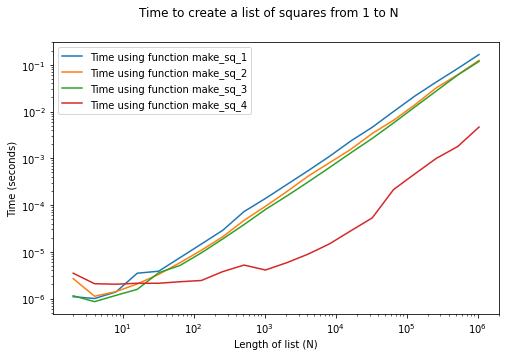

In [87]:
fig,ax = plt.subplots(1,1,figsize=(8,5)) # Initialize a plot.
N_array = np.array([2**n for n in range(1,21)]) # We'll try N in the array [2,4,8,..,~1 million]
for method in [make_sq_1, make_sq_2, make_sq_3, make_sq_4]: # A list of functions, oh my!
  time_array = np.zeros(len(N_array)) # Initialize an array of zeros
  for j,N in enumerate(N_array):  # See notes afterwards about the enumerate command.
    time_tot = 0
    for reps in range(10): # Average of 10 repetitions.
      start_time = time.time()
      method(N)
      end_time = time.time()
      time_tot += end_time - start_time
    time_ave = time_tot / 10
    time_array[j] = time_ave
  plt.plot(N_array, time_array, label='Time using function '+method.__name__)
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.suptitle('Time to create a list of squares from 1 to N')
plt.xlabel('Length of list (N)')
plt.ylabel('Time (seconds)')
plt.show()

In [88]:
time_array

array([3.48091125e-06, 2.07424164e-06, 2.02655792e-06, 2.12192535e-06,
       2.12192535e-06, 2.28881836e-06, 2.43186951e-06, 3.76701355e-06,
       5.19752502e-06, 4.07695770e-06, 5.84125519e-06, 8.91685486e-06,
       1.47819519e-05, 2.81333923e-05, 5.30481339e-05, 2.14338303e-04,
       4.65559959e-04, 9.95540619e-04, 1.77941322e-03, 4.64715958e-03])

Let's do a line-by-line analysis.

1.  `fig,ax = plt.subplots(1,1,figsize=(8,5))`

2.  `N_array = np.array([2**n for n in range(1,21)])`

3.  `for method in [make_sq_1, make_sq_2, make_sq_3, make_sq_4]:`

4.  `  time_array = np.zeros(len(N_array)) # Initialize an array of zeros`

5.  `  for j,N in enumerate(N_array):`

6.  `    time_tot = 0`
    `for reps in range(10):`
      `start_time = time.time()`
      `method(N)`
      `end_time = time.time()`
      `time_tot += end_time - start_time`
    `time_ave = time_tot / 10`

    `time_array[j] = time_ave`
7.    `plt.plot(N_array, time_array, label='Time using function '+method.__name__)`

8.  `plt.legend()`

9.  `plt.xscale('log')`
10. `plt.yscale('log')`

Line 1 initializes a plot, with figure size 8 inches by 5 inches.  The "1,1" means that the plot has no subplots, or more precisely, it is a 1 by 1 grid of plots.  (Only one plot).

In line 2, we use a list comprehension to make a list [2,4,8,16,..., 2^20].  Note that 2^20 is about one million.  These are the N's that we're going to work with.

Line 3 might be surprising and interesting.  The variable `method` is iterated through an array of four *functions*!  Yes, we can have a list of functions!  And then we can use those functions!  Functions are Python objects like any other, and they can be treated as such.

Lines 4-6 create an array of times.  Instead of using the %timeit magic, we store our times in an array, and we carry out a timing experiment from scratch.  Line 4 just initializes a numpy array of zeros to fill later.

Line 5 has a new command `enumerate` in the loop.  This makes `N` iterate through our `N_array`, and meanwhile `j` will simply "count up".  It's equivalent to setting `j=0` before the loop, and putting a `j = j + 1` within the loop to count.

Line 6 carries out the timing experiment.  It runs a function (`method`) to create a list of squares up to `N`.  It does this 10 times, checking the time before and after each time.  Then it computes the average amount of time elapsed (among the 10 repetitions) and records this in the `time_array`.

Line 7 plots `N` on the x-axis and time (`time_array`) on the y-axis with a line plot.  It assigns this plot a label, which is the name of the method.  To find the name of the function `method`, you can use `method.__name__`.  That's a bit fancier Python.

Finally, Line 8 produces the legend from the labels.  

Lines 9 and 10 make the x-axis and y-axis log-scaled, which is helpful since the variable `N` is increasing exponentially, and some times are as short as microseconds while others are closer to milliseconds or seconds.

The rest is styling.

## Exercises

1.  Interpret the plot above.  Which method is fastest for long lists?  Which method is fastest for short lists?  At what size `N` should you switch from one method to the other?

2.  Add another method to the plot, by defining your own function `make_sq_5` that mirros the basic structure of the other `make_sq` functions.  Note that your function must create the list in a different way, but it should still take the same parameter `N` and return a list or numpy array.  Create the plot with your function added to the other four, and compare the performance of your method to the others.

3.  Create a function with `def inflate(S):` which takes as input a string `S` and returns a string in which the 1st letter of `S` appears once, and the second letter appears twice, the third letter appears three times, etc.  For example, `inflate('Hello')` should return the string `'Heelllllllooooo'`.  You must use a loop of the form `for j,letter in enumerate(S):`, and *no other loops*!

Put your solutions here.

1. Similar to the results we saw after using `%timeit`, the method using numpy arrays is the fastest for long lists. While it is very close for shorter lists, the first function is the fastest. The fastest method just after the first N is method 3, then we should switch from function 3 to the numpy method when N is somewhere between 10 and 100. After that the numpy method would be the fastest.

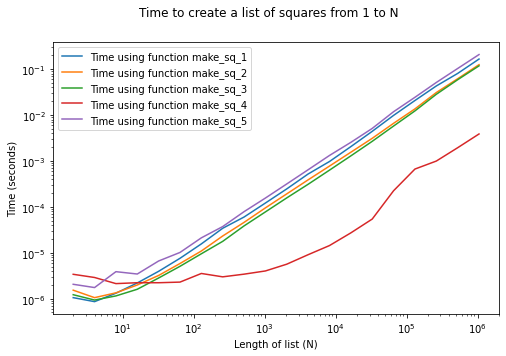

In [89]:
# Problem 2
def make_sq_5(N):
  A = np.zeros(N)
  for i in range(N):
      A[i] = i*i
  return A

fig,ax = plt.subplots(1,1,figsize=(8,5)) # Initialize a plot.
N_array = np.array([2**n for n in range(1,21)]) # We'll try N in the array [2,4,8,..,~1 million]
for method in [make_sq_1, make_sq_2, make_sq_3, make_sq_4, make_sq_5]: # A list of functions, oh my!
  time_array = np.zeros(len(N_array)) # Initialize an array of zeros
  for j,N in enumerate(N_array):  # See notes afterwards about the enumerate command.
    time_tot = 0
    for reps in range(10): # Average of 10 repetitions.
      start_time = time.time()
      method(N)
      end_time = time.time()
      time_tot += end_time - start_time
    time_ave = time_tot / 10
    time_array[j] = time_ave
  plt.plot(N_array, time_array, label='Time using function '+method.__name__)
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.suptitle('Time to create a list of squares from 1 to N')
plt.xlabel('Length of list (N)')
plt.ylabel('Time (seconds)')
plt.show()

2. For the 5th make square function, I used an nparray along with a for loop and it ended up being the slowest of the 5 methods. I graphed this as the purple line alongside the others using the same format but adding on my new make_sq_5 function in the third line with the variable `method`. Like the other functions, it starts off being faster than the make_sq_4 function, but quickly grows much slower.

In [90]:
# Problem 3
def inflate(S):
    L = [] # initiate an empty list
    S_two = "" # initiate an empty string
    for j,letter in enumerate(S): # loop through each letter in S while adding 1 to j
        L.append(letter*(j+1)) # append each letter times j+1 to L
    return S_two.join(L) # return L converted to a string

# test function
inflate("Hello")

'Heelllllllooooo'

# Final challenges!

Please turn in your notebooks with your attempts on **two** of the challenges below.  **Only two** will be graded.

## Challenge 1

If $N$ is a positive integer, then $r_3(N)$ is the number of ways that $N$ can be expressed as the sum of three squares.  Order and sign matter, so for example
$$6 = 1^2 + 1^2 + 2^2 = (-1)^2 + 1^2 + 2^2 = 2^2 + (-1)^2 + (-1)^2 = \cdots$$
These are all different ways of expressing 6 as the sum of three squares.  In fact, $r_3(6) = 8 \cdot 3 = 24$.  The 8 comes from the fact that there are eight sign-choices, and the 3 comes from the three orderings (1,1,2) and (1,2,1) and (2,1,1).

In other words, $r_3(N)$ is the number of elements in the following set:
$$\{ (a,b,c) \in {\mathbb Z}^3 : a^2 + b^2 + c^2 = N \}.$$

Write a function that computes $r_3(N)$ as efficiently as you can, for somewhat large values of $N$ (e.g., $N \approx 1000$).

You can check whether your function is behaving correctly, by comparing to the values found at the [Online Encyclopedia of Integer Sequences](https://oeis.org/A005875).




In [91]:
def rep_three(N):
  R = 0
  if N == 0:
      return 1
  for a in range(0, int(np.sqrt(N)+1)): # cycle through a values
      for b in range(a, int(np.sqrt(N)+1)): # cycle through b values
          for c in range(b, int(np.sqrt(N)+1)): # cycle through c values
              if (a*a)+(b*b)+(c*c)==N: # see if the sum of squares is equal to N
                  if a==b==c: 
                      R += 8 # add 8 if all are equal
                  elif a==0 or b==0 or c==0: # check if there are any zeros
                      if (a==0 and b==0) or (b==0 and c==0) or (a==0 and c==0):
                          R += 6 # add 2*3 to count if there are 2 zeros
                      else:
                          if b==c: 
                              R += 12 # when one b and c are equal
                          else:
                              R += 24 
                  elif a==b or b==c:
                      R += 24
                  else:
                      R += 48 # otherwise add 8*6
  return R # The result of your function should be R.

In [93]:
# the first 74 values of rep_three
# [1,6,12,8,6,24,24,0,12,30,24,24,8,24,48,0,6,48,36,24,24,48,24,0,24,30,72,32,0,72,48,0,12,48,48,48,30,24,72,0,24,96,48,24,24,72,48,0,8,54,84,48,24,72,96,0,48,48,24,72,0,72,96,0,6,96,96,24,48,96,48,0,36,48,120]

In [94]:
# check to see that the first 74 values match
[rep_three(n) for n in range(75)] == [1,6,12,8,6,24,24,0,12,30,24,24,8,24,48,0,6,48,36,24,24,48,24,0,24,30,72,32,0,72,48,0,12,48,48,48,30,24,72,0,24,96,48,24,24,72,48,0,8,54,84,48,24,72,96,0,48,48,24,72,0,72,96,0,6,96,96,24,48,96,48,0,36,48,120]

True

In [95]:
%timeit rep_three(1000)
# takes 8.42 milliseconds per loop
# updated function (after changing the ranges of the for loops): 2.19 milliseconds per loop

100 loops, best of 5: 2.16 ms per loop


### Observations:
For this challenge I first had $a$, $b$, and $c$ only loop through the range of values from 0 to the floor of $\sqrt{N}+1$ since the largest number that $a$, $b$, or $c$ could be is $\sqrt{N}$. Since we also had to account for the possibility that $a$, $b$, or $c$ equals 0, I added in if statements to check and change R accordingly. To double check that the function worked I tested the first 74 values of $N$ to see that the outputs matched the values found at the [Online Encyclopedia of Integer Sequences](https://oeis.org/A005875). Then, to see how quickly the function ran, I used `%timeit` on `rep_three(1000)` to see that it took 8.42 milliseconds per loop. 

With a second attempt to make the function run quicker, I adjusted the range of the for loops for $b$ and $c$ to start at $a$ and $b$, respectively. This way, we avoid repeating $(a, b, c)$ outputs and can account for how to count them into $R$ later on in a more efficient way. With this, using `%timeit` on `rep_three(1000)` I found that it took about $\frac{1}{4}$ of the time at 2.19 milliseconds per loop.

## Challenge 2

If $r$ is a positive real number, then the area of the circle of radius $r$ is $\pi r^2$.  If you place this circle around the origin, on a sheet of graph paper, then you will find *about* $\pi r^2$ "grid points" inside this circle.  The grid points inside the circle form the set
$$S = \{ (x,y) \in {\mathbb Z}^2 : x^2 + y^2 < r^2 \}.$$

Define $E(r) = \pi r^2 - \# S$ to be the "error" -- the difference between the area of the circle and the number of grid points within the circle.  

Create a plot with $r$ on the horizontal axis and $E(r)$ on the y-axis.  Try to accomplish this as efficiently as possible, where $r$ ranges from $0$ to $1000$.

Can you come up with a good bound $\vert E(r) \vert \leq f(r)$ for some nice function $f(r)$, just by looking at your plot?  I.e., your plot of $E(r)$ should be bounded above by the graph of $y = f(r)$ and below by the graph of $y = -f(r)$.  If you can come up with such a bound, plot it too.

In [96]:
import matplotlib.pyplot as plt # Use plt.<command> hereafter.
import numpy as np

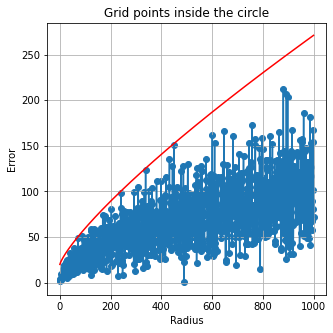

In [97]:
A = np.zeros((1001, 2))
for r in range(1001):
    count = 0
    A[r][0] = r
    rsqr = r**2
    for x in range(1, r): # cycle through all the x values
        xsqr = x**2
        for y in range(1, r): # cycle through all the y values
            if xsqr + y**2 < rsqr: # is x^2+y^2<r^2?
                count += 4
    A[r][1] = abs((np.pi*rsqr)-(count+4*(r-1)+1))

plt.figure(figsize=(5,5))
plt.plot(A[:, 0], A[:, 1])
xlist = A[:, 0] # x coordinates
ylist = A[:, 1] # y coordinates
plt.scatter(xlist, ylist)
plt.xlabel('Radius')
plt.ylabel('Error') # the difference between the area of the circle and the number of grid points within the circle
plt.title('Grid points inside the circle')
x = np.linspace(0, 1000, 1000)
plt.plot(x, x**.8+20, c = 'red') # lower bound, y=x^c+k where c<1 and k>0
plt.grid()
plt.show()

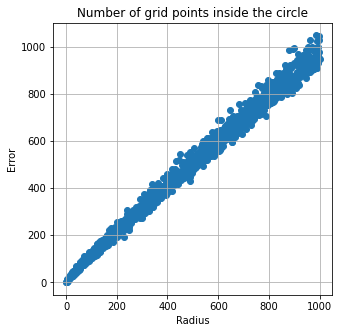

In [98]:
# attempt to make the program more efficient
A = np.zeros((1001, 2))
for r in range(1001):
    count = (2*int(r/np.sqrt(2))+1)**2 # r/sqrt(2) away from the origin
    A[r][0] = r
    rsqr = r**2
    for x in range(int(r/np.sqrt(2)) +1 , r): # cycle through all the x values
        xsqr = x**2
        for y in range(1, r): # cycle through the y values
            if xsqr+y**2 < rsqr: # is x^2+y^2<r^2?
                count += 8
    A[r][1] = abs((np.pi*rsqr)-count-(r-1-int(r/np.sqrt(2))))

plt.figure(figsize=(5,5))
xlist = A[:, 0] # x coordinates
ylist = A[:, 1] # y coordinates
plt.scatter(xlist, ylist)
plt.xlabel('Radius')
plt.ylabel('Error') # the difference between the area of the circle and the number of grid points within the circle
plt.title('Number of grid points inside the circle')
x = np.linspace(0, 100, 100)
#plt.plot(x, ((np.pi)*x**2)-(2*(x/np.sqrt(2))+1)**2, c = 'lightblue')
#plt.plot(x, x**2, c = 'red') # lower bound
#plt.plot(x, (np.pi)*x**2, c = 'red') # upper bound could be the actual radius
plt.grid()
plt.show()

In [99]:
def radius_error1(n):
    A = np.zeros((n+1, 2))
    for r in range(n+1):
        count = 0
        A[r][0] = r
        rsqr = r**2
        for x in range(1, r): # cycle through all the x values
            xsqr = x**2
            for y in range(1, r): # cycle through all the y values
                if xsqr + y**2 < rsqr: # is x^2+y^2<r^2?
                    count += 4
        A[r][1] = abs((np.pi*rsqr)-(count+4*(r-1)+1))

In [100]:
def radius_error2(n):
    A = np.zeros((n+1, 2))
    for r in range(n+1):
        count = (2*int(r/np.sqrt(2))+1)**2 # r/sqrt(2) away from the origin
        A[r][0] = r
        rsqr = r**2
        for x in range(int(r/np.sqrt(2)) +1 , r): # cycle through all the x values
            xsqr = x**2
            for y in range(1, x+1): # cycle through the y values
                if xsqr+y**2 < rsqr: # is x^2+y^2<r^2?
                    count += 8
        A[r][1] = abs((np.pi*rsqr)-count-(r-1-int(r/np.sqrt(2))))

In [101]:
%timeit radius_error1(100)
# 107 milliseconds per loop

10 loops, best of 5: 108 ms per loop


In [102]:
%timeit radius_error2(100)
# 26.7 milliseconds per loop (much faster than the first function)

10 loops, best of 5: 26.2 ms per loop


### Observations:
The graph of the difference between the area of the circle and the number of grid points within the circle against the radius is an exponential graph. Based on the graph, I tried to guess the upper bound for the error function, and since there are some errors that are close to 0, it appears that is the lower bound and for the upper bound I chose a function of the form 
$$y=x^c+k$$
where $0<c<1$ and $k>1$. From this I found that $y=x^{.8}+20$ appeared to fit the graph. 

To make the prgram more efficient, I changed the range for the for loops that x and y iterated through and found using the `%timeit` function that it took about $\frac{1}{5}$ of the time.

## Challenge 3

The following result was found by Euler, but I've changed his numbers to $A$ and $B$ to make your life hard.

Theorem:  A prime number $p$ can be expressed in the form $x^2 + 3 y^2$ if and only if $p$ is congruent to $A$ modulo $B$ (i.e., `p % B == A`).  

Use experimental techniques to determine $A$ and $B$.  Now try the same for $3$ replaced by $4,5,6,7,8,9$. 

## Challenge 4

Pascal's triangle has $1$ in the first row, then $1, 1$ in the second rod, then $1,2,1$ in the third row, etc.  One can place these numbers in a triangle, with "rows" as diagonals, as drawn below.

1 1 1 1 1 1

1 2 3 4 5

1 3 6 10

1 4 10

1 5

1

Et cetera.

Turn these numbers into black and white dots, depending on whether they are even (black) or odd (white).  This produces an image like the following:

X X X X X X

X O X O X

X X O O

X O O

X X

X

Now perform this in PIL, to create an image that fills the top-left triangle in an image of at least 200 x 200 pixels.  You should *not* be computing giant numbers like 200 factorial!  Each row of Pascal's triangle can be computed from the previous by addition... and you can perform this "mod 2" all the way through.

Extra fun:  instead of black/white dots for even/odd, try colors based on remainders after dividing by three, by four, etc.


## Challenge 5

Often when visualizing time-series data, it makes sense to look not at day-by-day changes, but rather at a 7-day rolling average.  For example, when looking at Covid-19 cases, there are reporting fluctuations from day to day, so instead it is usually better to look at the average number of cases over the previous 7 days.

Write a function `def rolling(A, window=7):` which takes as input a one-dimensional numpy array `A`, and a parameter `window` whose default value is `7`.  The function must return an array `R` whose length is shorter than the length of `A`.  The entry `R[j]` should be the **average** of `A[j]`, `A[j+1]`, etc., up to `A[j+window-1]`.  

Then use this function and matplotlib to produce a plot:  a line plot of the array `A` produced below, and a line plot of the 7-day rolling average `R` produced by your function.  These plots should be on the same figure, and clearly labeled.


In [ ]:
# Here is the code to produce your test array A.
# Please use this array in your plot!

x_array = np.arange(300)
A = 5*(x_array/200)**2
A = A + np.random.random(len(A))

In [ ]:
# Please use this code to import matplotlib.
import matplotlib.pyplot as plt

In [ ]:
# Here is a plot of the array, to get you started.  
plt.plot(x_array, A)

# Now it's time to write your function to produce the 7-day rolling average, add it to the plot, and make everything clear and labeled.